In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn import linear_model


In [122]:
hitches = [line.rstrip('\r\n') for line in open(r'C:\Users\syber\Desktop\THESIS\Hitches\THESIS-sandbox.csv')]
type(hitches)

list

In [123]:
import re
from datetime import timedelta

regex = re.compile(r'((?P<days>\d+?)d)?((?P<hours>\d+?)h)?((?P<minutes>\d+?)m)?((?P<seconds>\d+?)s)? (?P<date>\d+?M\d+?Y)?$')

def parse_time(time_str):
    parts = regex.match(time_str)
    if not parts:
        return
    parts = parts.groupdict()
    
    time_params = {}
    interval_params = ['days', 'hours', 'minutes', 'seconds']
    for (name) in (interval_params):
        time_params[name] = int(parts[name])
           
    return int(timedelta(**time_params).seconds), parts['date'] 

In [125]:
wow = map(parse_time, hitches)

In [126]:
kek = np.asmatrix(wow)
kek[3:7]

matrix([['405', '06M18Y'],
        ['857', '06M18Y'],
        ['568', '06M18Y'],
        ['329', '06M18Y']], 
       dtype='|S11')

In [127]:
kek.shape

(10655L, 2L)

In [128]:
keys = np.array(kek[:,1])
type(keys)

numpy.ndarray

In [129]:
keys[3:7]

array([['06M18Y'],
       ['06M18Y'],
       ['06M18Y'],
       ['06M18Y']], 
      dtype='|S11')

In [130]:
unkeys = np.unique(keys)
unkeys

array(['01M17Y', '01M18Y', '02M17Y', '02M18Y', '03M17Y', '03M18Y',
       '04M17Y', '04M18Y', '05M17Y', '05M18Y', '06M17Y', '06M18Y',
       '07M17Y', '08M17Y', '09M17Y', '10M17Y', '11M17Y', '12M16Y', '12M17Y'], 
      dtype='|S11')

In [148]:
dict = {}
for date in unkeys:
    wow = np.squeeze(np.asarray(kek[kek[:,1] == date]))
#     print type(wow)
#     print wow.shape
#     dict[date] = np.array(wow).astype(np.int)
    dict[date] = np.mean(np.array(wow).astype(np.int))
    
print dict

{'07M17Y': 10292.386324786325, '01M18Y': 2612.6482142857144, '06M17Y': 11118.121065375302, '02M18Y': 1780.9032258064517, '05M18Y': 3077.3775999999998, '05M17Y': 19117.685025817555, '02M17Y': 13297.081920903955, '06M18Y': 3453.1700000000001, '01M17Y': 13141.047091412742, '12M17Y': 6421.5971049457175, '12M16Y': 10525.905376344086, '08M17Y': 9569.4012738853507, '03M18Y': 4225.7058823529414, '09M17Y': 11938.688059701493, '04M18Y': 3431.4448105436572, '10M17Y': 7060.9845679012342, '04M17Y': 18445.365180467092, '11M17Y': 4819.5399361022364, '03M17Y': 11080.773930753565}


In [147]:
print type(dict['01M17Y'])
print type(dict['01M17Y'][1])
print type(dict['01M17Y'])
np.mean(dict['01M17Y'])

<type 'numpy.ndarray'>
<type 'numpy.int32'>
<type 'numpy.ndarray'>


13141.047091412742

([<matplotlib.axis.XTick at 0xa0e0e48>,
 <a list of 19 Text xticklabel objects>)

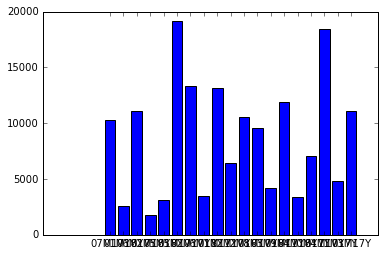

In [152]:
 plt.bar(range(len(dict)), dict.values(), align='center')  # python 2.x
plt.xticks(range(len(dict)), dict.keys())